intercept =  -11.1560 m = 0.9835
intercept =  -11.1560 m = 0.9835
intercept =  -11.1560 m = 0.9835
intercept =  -11.1560 m = 0.9835
intercept =  -11.1562 m = 0.9835
intercept =  -11.1569 m = 0.9835


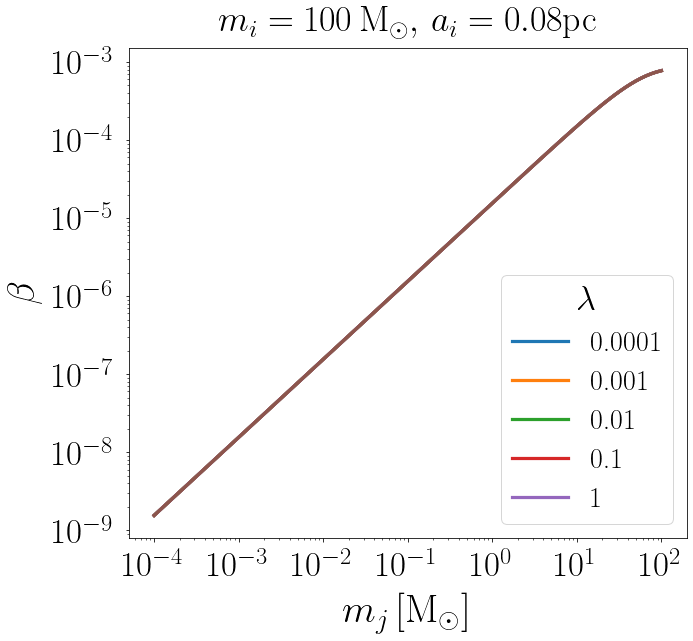

In [8]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import math
from module import *
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.optimize import curve_fit
import matplotlib.ticker as mticker

plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})

fig, ax = plt.subplots(1, figsize = (10, 9))
plt.rc('lines', linewidth = 3.2)


M_1PBH = 100    #in units of solar mass
M_2PBH = np.geomspace(1e-4, 100, 100)   #in units of solar mass
M_2PBH_list = M_2PBH.tolist()
a_i = 0.08   #in units of pc

λ_0_list = [1e-4, 1e-3, 1e-2, 0.1, 1, 10]


def beta(λ_0, M_2PBH): #Final semi-major axis of the PBH binary.
    s = s_dec_halo(λ_0)
    return ((G*M_1PBH*M_2PBH)/((G*M_(M_1PBH,s)*M_(M_2PBH,s))-(2*a_i*(E_b(M_1PBH,s)+E_b(M_2PBH,s)))))



beta_list = np.zeros(len(M_2PBH_list))
for j, λ_0 in enumerate(λ_0_list):
    for i, M_2PBH in enumerate(M_2PBH_list):
        beta_list[i] = beta(λ_0, M_2PBH)

    ax.loglog(M_2PBH_list, beta_list, '')
    slope, intercept = np.polyfit(np.log(M_2PBH_list), np.log(beta_list), 1)
    print("intercept = ", '%0.4f'%intercept, "m =", '%0.4f'%slope)


plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
ax.tick_params(axis='x', pad= 9.9)
ax.tick_params(axis='y', pad= 9.9)
plt.xlabel(' $m_{j}\, [\mathrm{M_{\odot}}] $',fontsize= 39.5, labelpad = 11)
plt.ylabel(r'$\beta$',fontsize= 39.5, labelpad = 11)
plt.legend([ λ_0_list[0], λ_0_list[1] , λ_0_list[2], λ_0_list[3], λ_0_list[4]
            ], title = r'$\lambda$',title_fontsize= 35, 
           prop= {'size':28}, facecolor = 'white',loc='lower right',shadow = False,fontsize=150)
plt.title('$m_{i} = 100\, \mathrm{M_{\odot}}, \, a_{i} = 0.08 \mathrm{pc}$', fontsize= 36, pad = 17)
plt.savefig('beta.pdf', bbox_inches="tight")
plt.show()